In [1]:
import numpy as np
import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('titanic_train.csv')

In [4]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

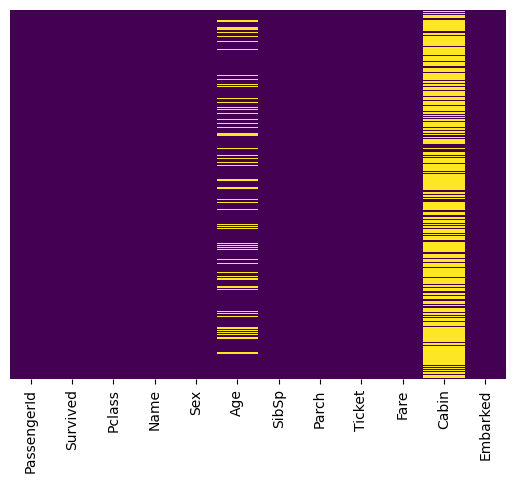

In [5]:
sns.heatmap(train_data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [10]:
sns.set_style('darkgrid')

<Axes: xlabel='Survived', ylabel='count'>

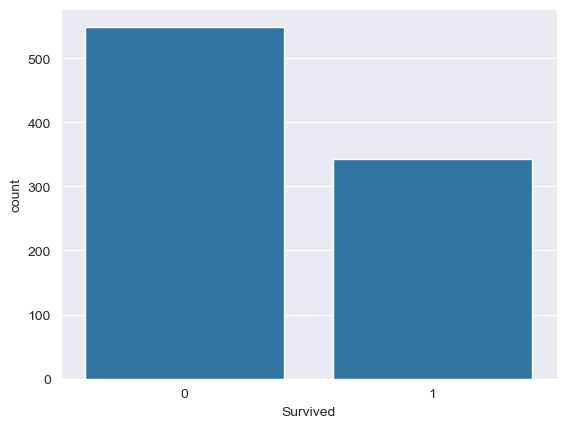

In [11]:
sns.countplot(x='Survived',data=train_data)

<Axes: xlabel='Survived', ylabel='count'>

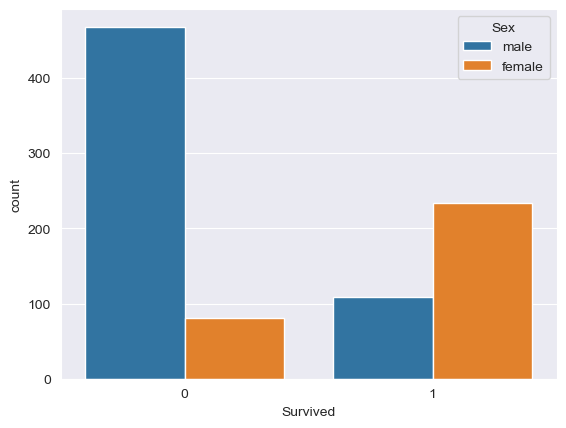

In [12]:
sns.countplot(x='Survived',data=train_data, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

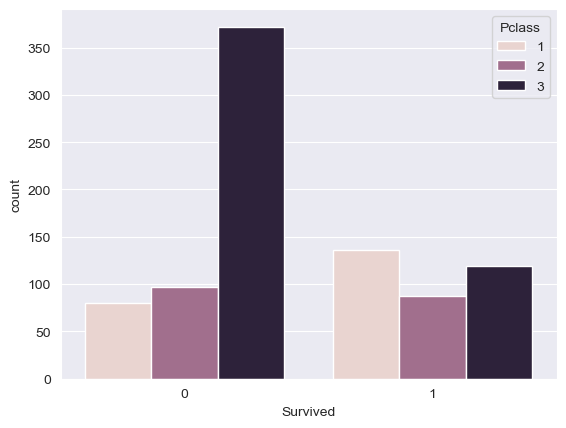

In [13]:
sns.countplot(x='Survived',data=train_data, hue='Pclass')

<Axes: xlabel='Age', ylabel='Count'>

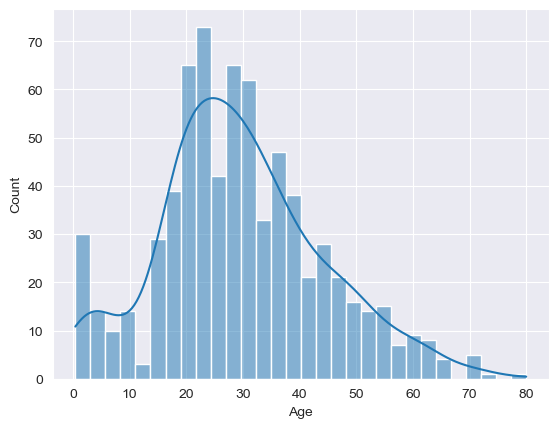

In [16]:
sns.histplot(train_data['Age'].dropna(),kde=True, bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

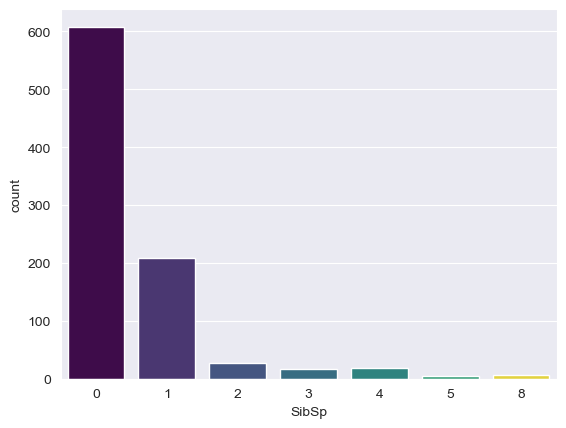

In [20]:
sns.countplot(
    x="SibSp",
    data=train_data,
    hue="SibSp",        # use same column for hue
    palette="viridis",
    legend=False        # remove duplicated legend
)


In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

<Axes: >

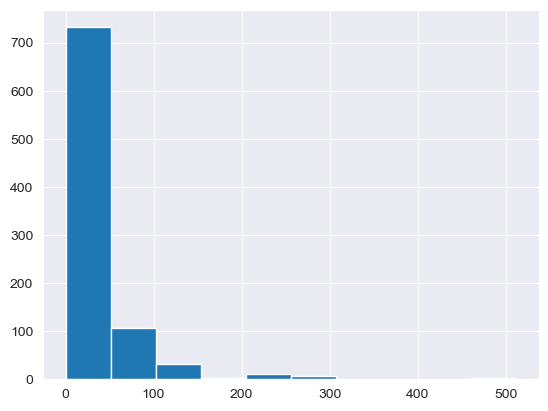

In [27]:
train_data['Fare'].hist()

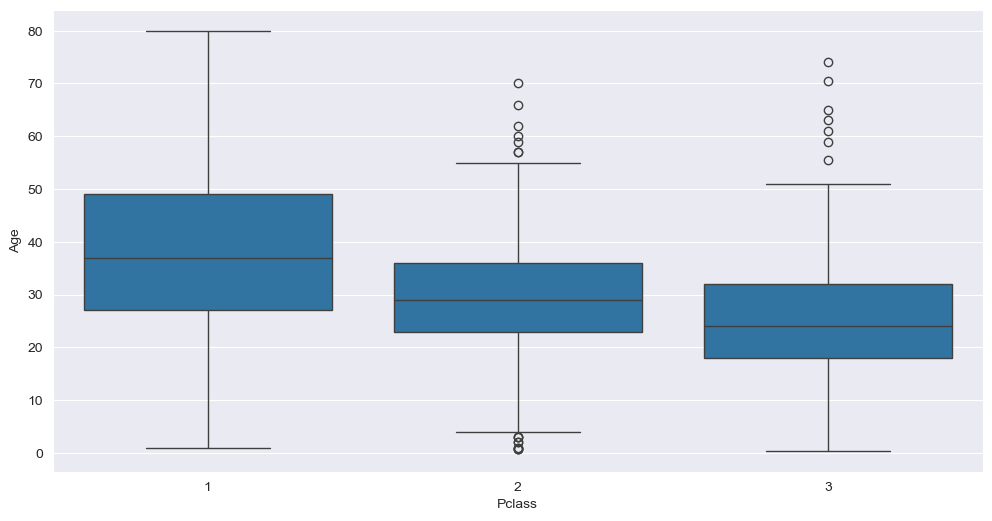

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train_data)
plt.show()


In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [32]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\MuzuvukileNqwiliso\AppData\Local\Temp\ipykernel_9260\822839471.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\MuzuvukileNqwiliso\AppData\Local\Temp\ipykernel_9260\822839471.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

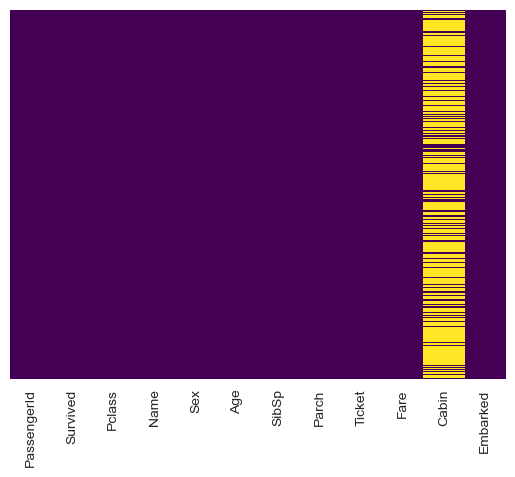

In [33]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [46]:
sex = pd.get_dummies(train_data['Sex'],drop_first=True).astype(float)

In [47]:
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [44]:
embark = pd.get_dummies(train_data['Embarked'], drop_first=True).astype(float)


In [45]:
embark.head()

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [48]:
train_data = pd.concat([train_data, sex, embark],axis=1)

In [49]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,True,False,True,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,False,True,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,True,False,True,1.0,0.0,1.0


In [53]:
train_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

KeyError: "['Sex' 'Embarked' 'Name' 'Ticket'] not found in axis"

In [54]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,True,False,True,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,C85,False,False,False,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,NaN,False,False,True,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,C123,False,False,True,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,NaN,True,False,True,1.0,0.0,1.0


In [76]:
train_data.drop(['Sex'],axis=1,inplace=True)



KeyError: "['Sex'] not found in axis"

In [77]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True,1.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,False,False,False,0.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,False,False,True,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,False,False,True,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,True,False,True,1.0,0.0,1.0


In [78]:
X = train_data.drop('Survived',axis=1)
y = train_data['Survived']

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [82]:
from sklearn.linear_model import LogisticRegression

In [83]:
lm = LogisticRegression()

In [84]:
lm.fit(X_train, y_train)

c:\Users\MuzuvukileNqwiliso\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [85]:
predictions = lm.predict(X_test)

In [86]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       207
           1       0.80      0.68      0.73       150

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

